In [38]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import sqlalchemy as alch
import numpy as np

In [49]:
# Set up emngines and connections
engine = alch.create_engine('sqlite:///jobs_preprocessed.db', echo=False)
engine_2 = alch.create_engine('sqlite:///Doc2Vec20t2d.db', echo=False)

In [50]:
con1 = engine.connect()
con2 = engine_2.connect()

In [51]:
# verify row count in both
result = con1.execute("SELECT COUNT(*) FROM jobs")
for row in result:
    count = row[0]
print(count)

3279172


In [52]:
result = con2.execute("SELECT COUNT(*) FROM jobs")
for row in result:
    count = row[0]
print(count)

3279172


In [53]:
%%time
topic_counts = [0]*20
# create a topic counter from the second connection
result = con2.execute("SELECT tsne FROM jobs")
for row in result:
    topic_counts[row[0]]+=1

Wall time: 6.03 s


In [54]:
# display the number of ads in each topic
print(topic_counts)

[106984, 159879, 173877, 279947, 300345, 98911, 179610, 149951, 105396, 124465, 116082, 258512, 218410, 123016, 134563, 370981, 136594, 95071, 81539, 65039]


In [55]:
%%time
# load all jobid/topic pairs
i=0
pairs = [None]*count
result = con2.execute("SELECT * FROM jobs")
for row in result:
    pairs[i] = [row[0], row[1]]
    i+=1

Wall time: 26.8 s


In [56]:
print(pairs[1578])

[37001578, 7]


In [57]:
def generate_cloud(topic_id):
    # create a wordcloud for a desired topic
    ad_count = topic_counts[topic_id]
    ads = [None]*ad_count

    i = 0
    j = 0
    print(len(ads))
    result = con1.execute("SELECT jobid, jobDescription FROM jobs")
    for row in result:
        if topic_id == pairs[i][1]:
            ads[j] = row[1]
            j+=1
        i+=1
    ads = ' '.join(ads)
    stopwords = set(STOPWORDS)
    # extend the stopwords
    new_stopwords = ['use', 'work', 'role', 'exciting','like', 'candidate',
                   'skill','experience','join','team','business','career','hourly','part','time','hourly','hour','pay','day']
    for word in new_stopwords:
        stopwords.add(word)
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords,
                    max_words = 100,
                    min_font_size = 10, color_func=lambda *args, **kwargs: (0,0,0)).generate(ads) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 


106984


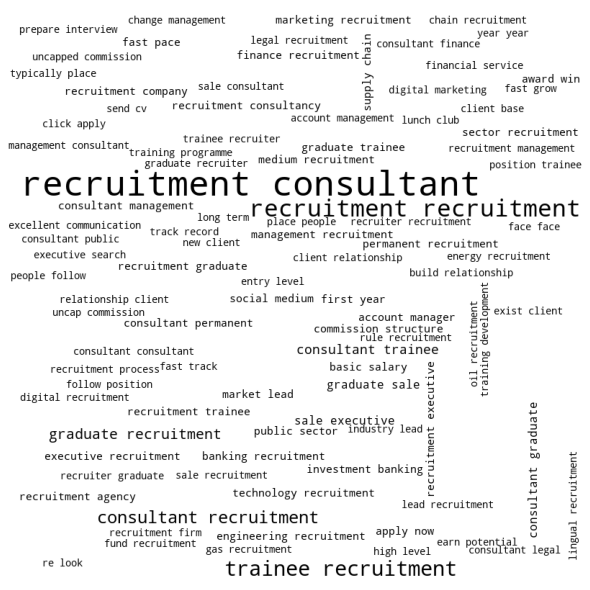

In [58]:
generate_cloud(0)

159879


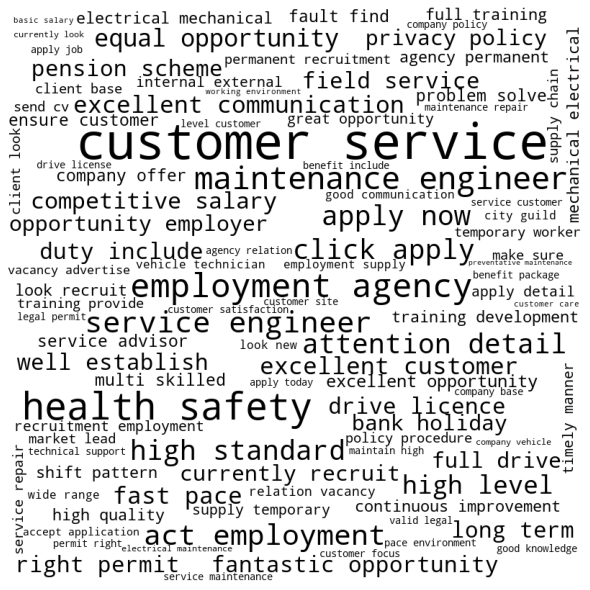

In [59]:
generate_cloud(1)

173877


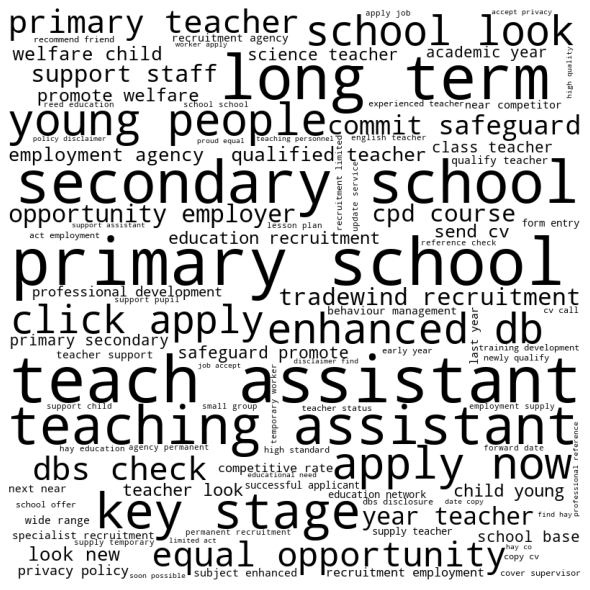

In [60]:
generate_cloud(2)

279947


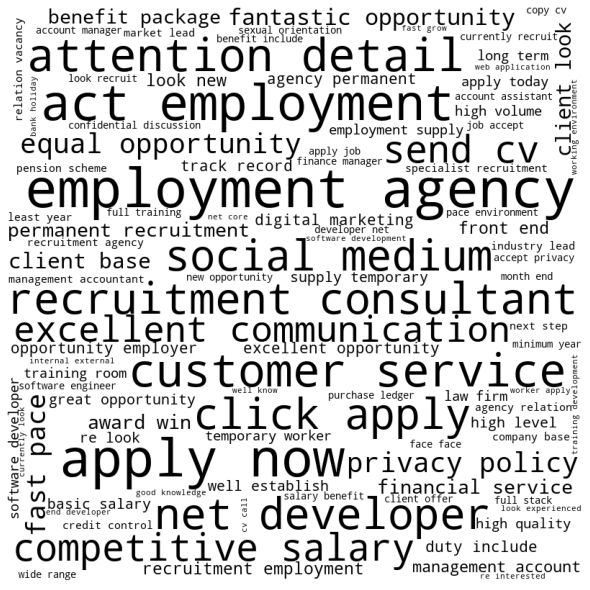

In [61]:
generate_cloud(3)

300345


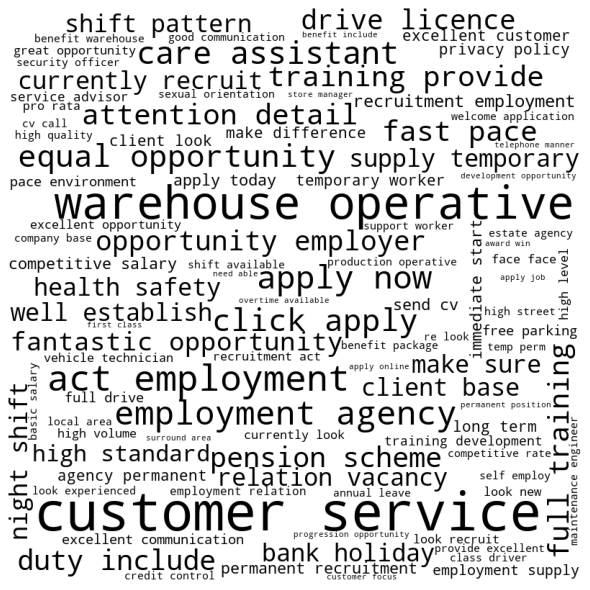

In [62]:
generate_cloud(4)

98911


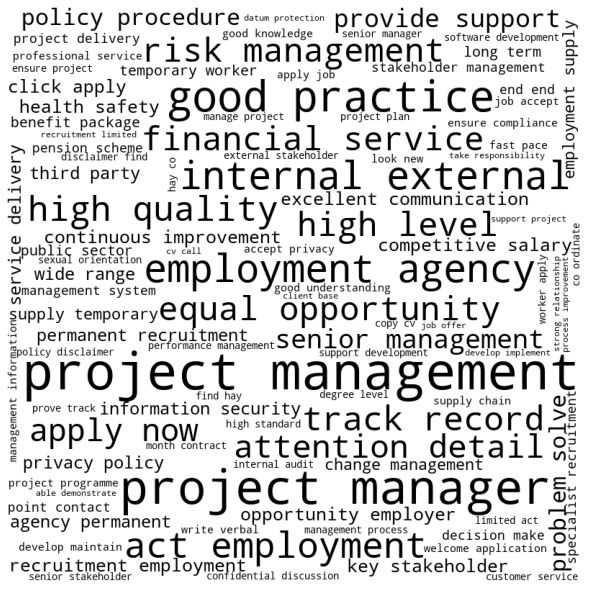

In [63]:
generate_cloud(5)

179610


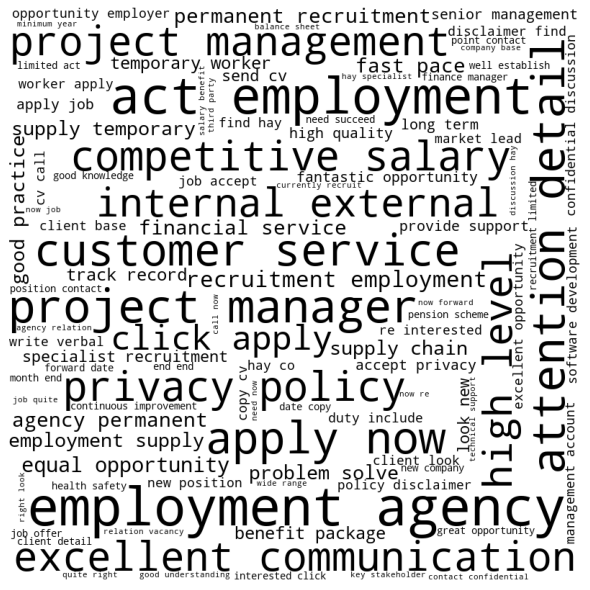

In [64]:
generate_cloud(6)

149951


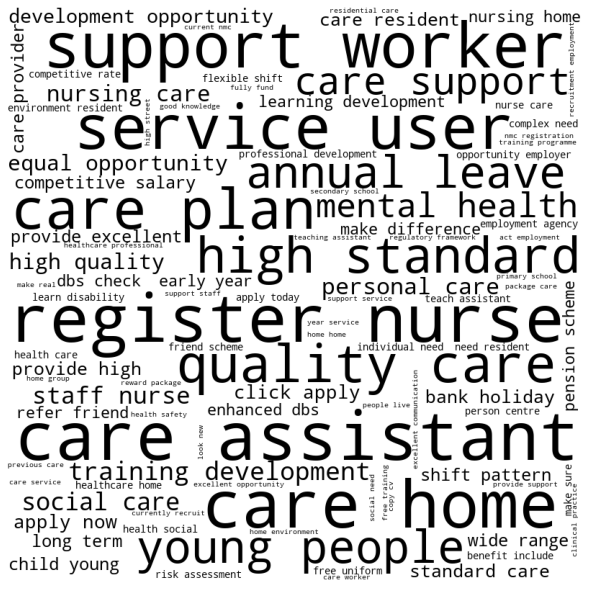

In [65]:
generate_cloud(7)

105396


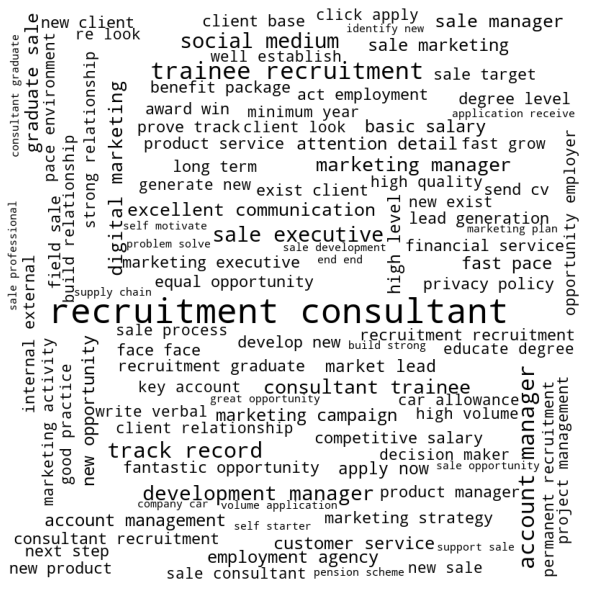

In [66]:
generate_cloud(8)

124465


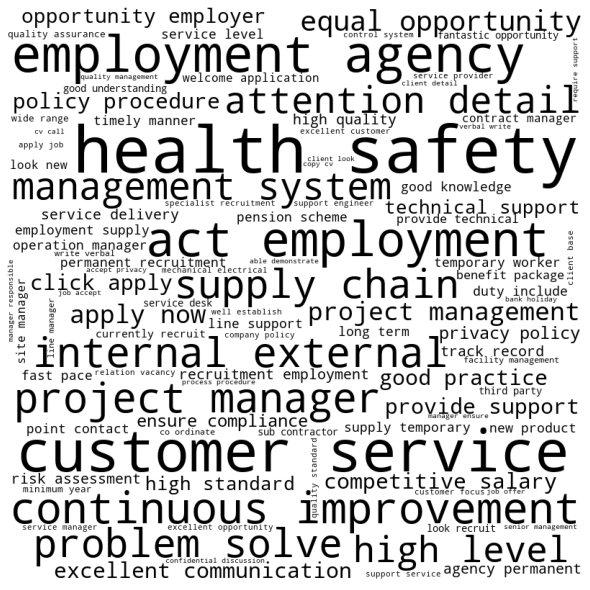

In [67]:
generate_cloud(9)

116082


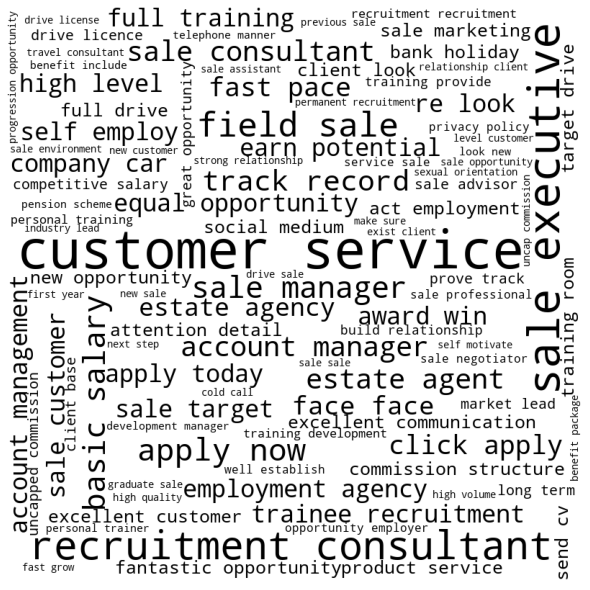

In [68]:
generate_cloud(10)

258512


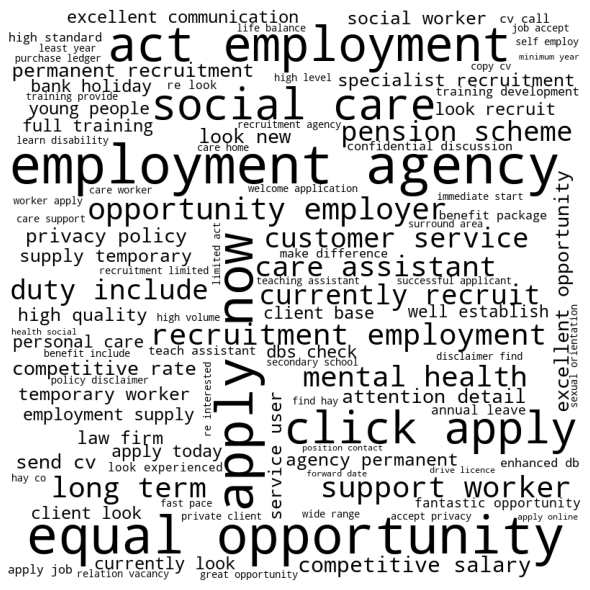

In [69]:
generate_cloud(11)

218410


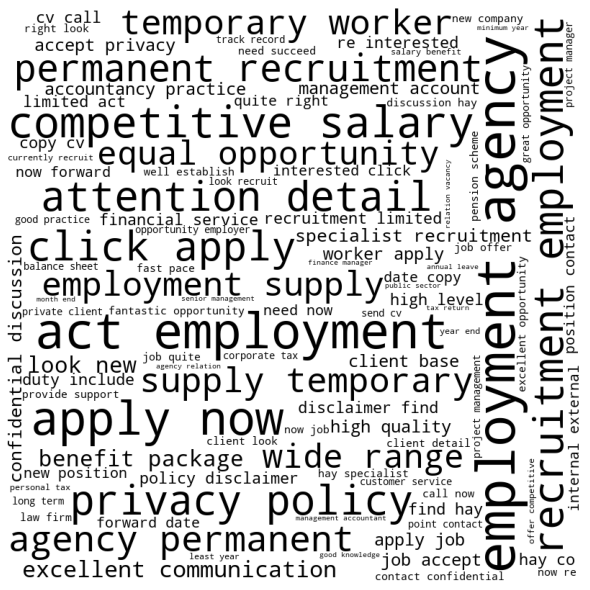

In [70]:
generate_cloud(12)

123016


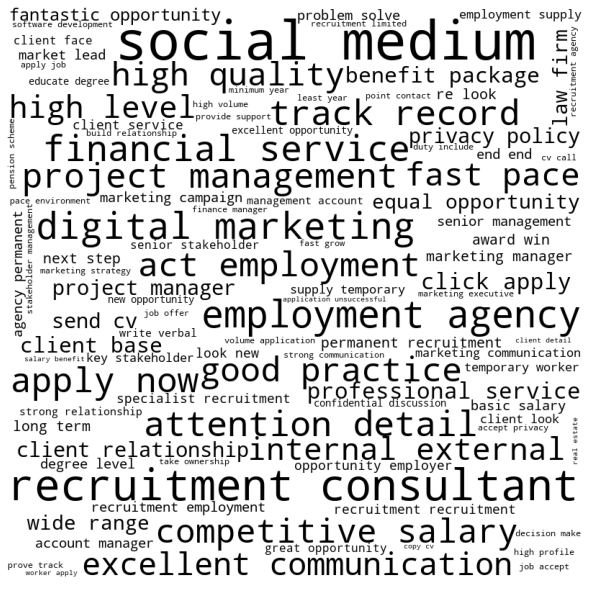

In [71]:
generate_cloud(13)

134563


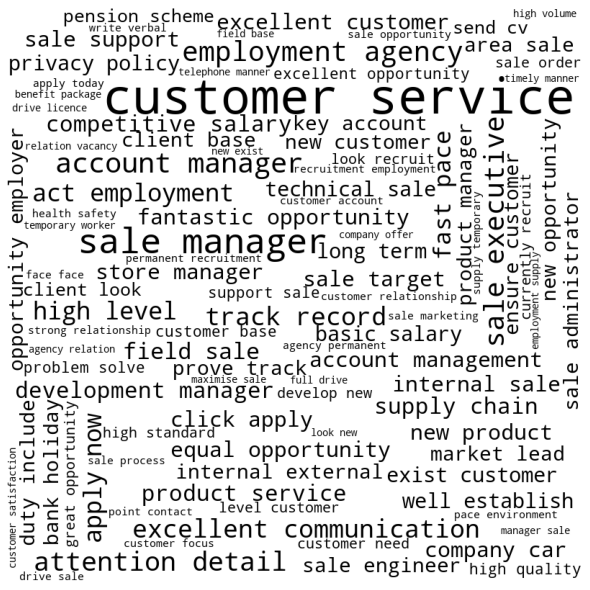

In [72]:
generate_cloud(14)

370981


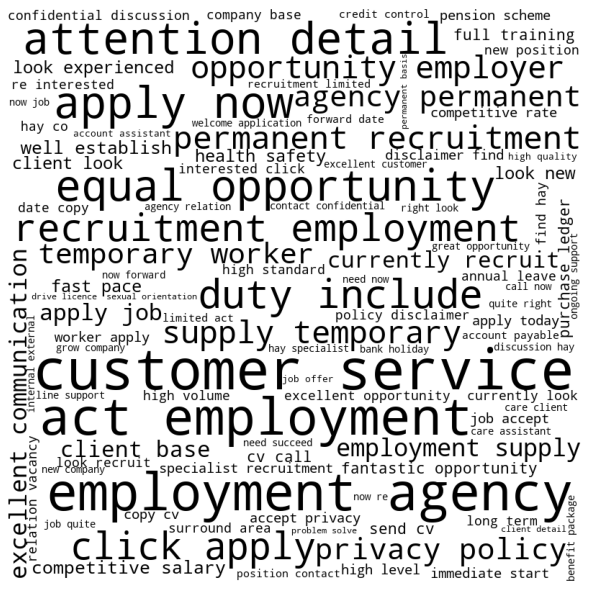

In [73]:
generate_cloud(15)

136594


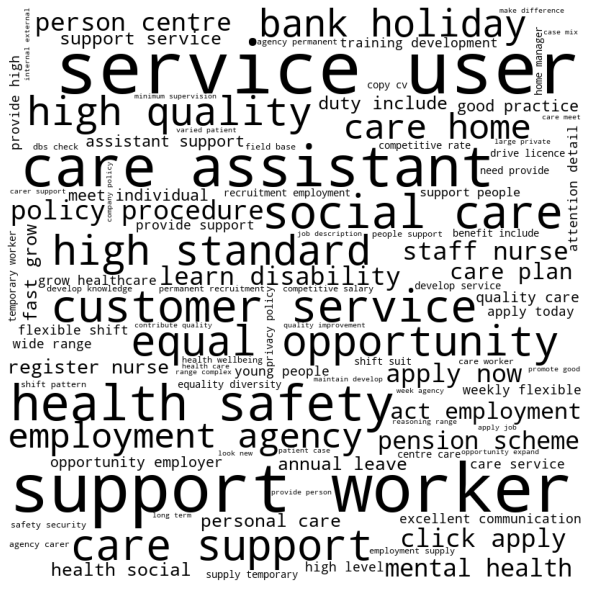

In [74]:
generate_cloud(16)

95071


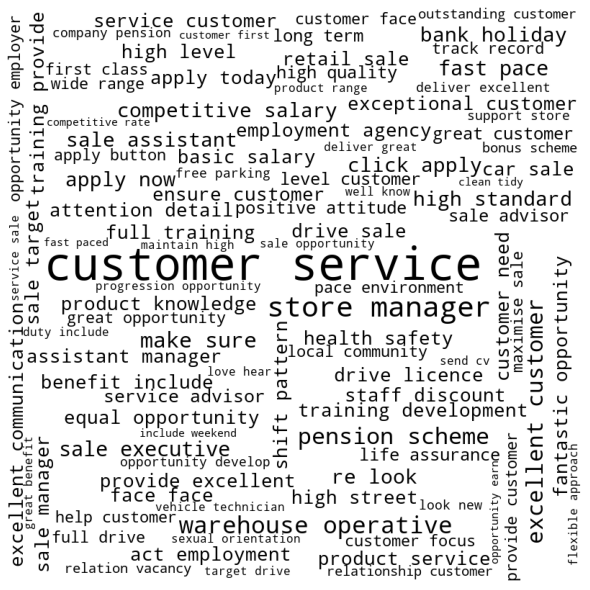

In [75]:
generate_cloud(17)

81539


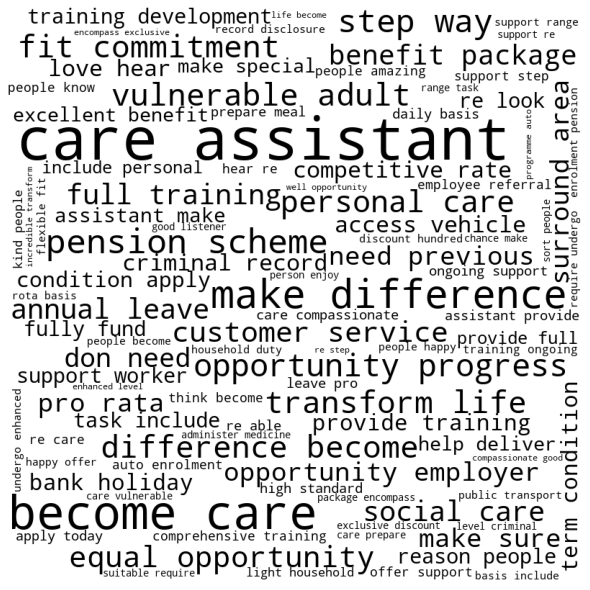

In [76]:
generate_cloud(18)

65039


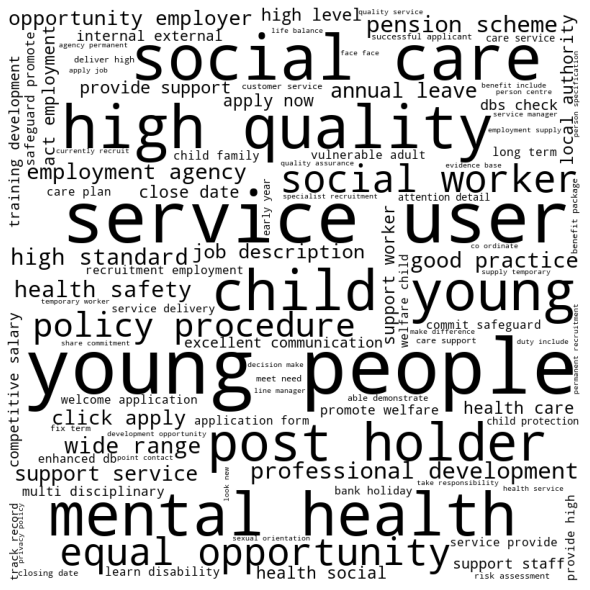

In [77]:
generate_cloud(19)